In [1]:
import numpy as np
import pandas as pd

from pathlib import Path

import sys

sys.path.append('../src')

import warnings
warnings.filterwarnings("ignore")

### Test focal region similarity

In [2]:
from Config.config import PATHS
from Classes.focal_regions import FocalRegion

In [3]:
region = np.array([[1, 0, 1], [1, 1, 0], [0, 1, 1]])
fra = FocalRegion(region)
fra.debug = True

# history = np.array([[1, 0], [0, 1], [0, 1]])
history = np.array([[0], [1], [1]])
print('History:\n', history)
print('-'*60)
scores = fra.get_similarity_scores(history)
print('Scores:\n', scores)
print('-'*60)

History:
 [[0]
 [1]
 [1]]
------------------------------------------------------------
	Cicle from column 0:
[[1]
 [1]
 [0]]
	Similarity score: 0.3333333333333333
	Cicle from column 1:
[[0]
 [1]
 [1]]
	Similarity score: 1.0
	Cicle from column 2:
[[1]
 [0]
 [1]]
	Similarity score: 0.3333333333333333
Scores:
 [np.float64(0.3333333333333333), np.float64(1.0), np.float64(0.3333333333333333)]
------------------------------------------------------------


<Axes: >

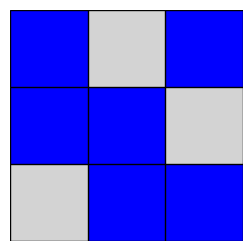

In [4]:
file_name = Path('..', 'LaTeX', 'FRA_region_1.png')
FocalRegion.draw_region(region, file=file_name)

<Axes: >

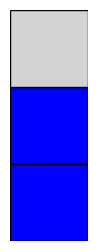

In [5]:
file_name = Path('..', 'LaTeX', 'history_2.png')
FocalRegion.draw_region(history, file=file_name)

### Test Focal Regions

In [6]:
from Classes.focal_regions import SetFocalRegions

In [7]:
sfr = SetFocalRegions(
    num_agents=2,
    threshold=0.5,
    len_history=2,
    max_regions=3,
)
sfr.generate_focal_regions()
print(sfr)

------------------------------------------------------------
[[0. 1.]
 [1. 0.]]
------------------------------------------------------------------------------------------------------------------------
[[0. 0.]
 [1. 1.]]
------------------------------------------------------------------------------------------------------------------------
[[1. 1.]
 [0. 0.]]
------------------------------------------------------------


In [8]:
history = np.array([1, 0])
sfr.add_history(history)
history = np.array([0, 1])
sfr.add_history(history)
sfr.debug = True
sfr.get_action_preferences(0)

Region 0: [0. 1.]
Region 1: [0.5 0. ]
Region 2: [0.  0.5]


array([0.5, 1.5])

### Test FRA agents

In [9]:
from Classes.bar import Bar
from Utils.interaction import Episode
from Classes.cognitive_model_agents import FocalRegionAgent

In [10]:
free_parameters = {
    'inverse_temperature': 30,
    'len_history': 2,
    'max_regions': 5,
    'c': 0.1
}
fixed_parameters = {
    'num_agents': 2,
    'threshold': 0.5,
}
n = 1

<Axes: >

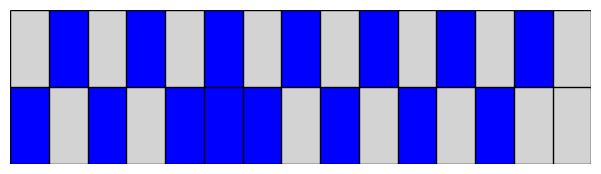

In [11]:
# Create the environment
bar = Bar(
    num_agents=fixed_parameters['num_agents'],
    threshold=fixed_parameters['threshold']
)
# Create the agents
agents = [FocalRegionAgent(free_parameters, fixed_parameters, n) for n in range(fixed_parameters['num_agents'])]
# Create the episode
episode = Episode(
    model='FRA',
    agents=agents,
    environment=bar,
    num_rounds=20
)

episode.run()

bar.render()

# Test parameter fit

In [12]:
from Classes.cognitive_model_agents import Titan
from Classes.parameter_recovery import ParameterFit

In [13]:
best_fit_file_2P = PATHS['parameter_fit_results'] / 'best_fit_2P_3.json'

#Load 2P data
file = PATHS['human_data'] / '2-player-UR.csv'
print(f'Loading data from {file}...')
data = pd.read_csv(file)
data.head(2)

Loading data from /Users/edgar/Documents/GitHub/Cognitive_Models_El_Farol_Bar_Problem/data/human/2-player-UR.csv...


,source,treatment,group,round,player,choice,score,attendance,ac_score,threshold,num_players,room,decision
0,human,score + grid,Grupo-0001,1,405186428721292,0,0,1,25,0.5,2,Grupo-0001,0
1,human,score + grid,Grupo-0001,1,728608683559397,1,1,1,25,0.5,2,Grupo-0001,1


In [14]:
# check_out_these = ['Attendance-M2', 'MFP-M2', 'Payoff-M2']
# my_models = [FocalRegionAgent]
my_models = [Titan]

ParameterFit.run(
    data=data,
    model_list=my_models,
    best_fit_path=best_fit_file_2P,
    optimizer_type='scipy',
    hyperparameters={},
    new_file=False
)

Fitting models...:   0%|                                  | 0/1 [00:00<?, ?it/s]

Fitting data to model FRA+Payoff+Attendance...
Creating parameter recovery class...
Running optimizer...
Finding deviance for 2 players and threshold 0.5...


Fitting models...: 100%|██████████████████████████| 1/1 [00:31<00:00, 31.37s/it]

Optimal parameters for 2 players and threshold 0.5:
{'inverse_temperature': np.float64(8.989297112656626), 'bias': np.float64(1.0), 'learning_rate': np.float64(0.0), 'len_history': np.float64(1.2185610225019845), 'max_regions': np.float64(3.3476545044280956), 'c': np.float64(0.012318058838274646), 'delta': np.float64(1.0)}
Deviance: -3187.918298686422
AIC: 6389.836597372844
--------------------------------------------------


In [15]:
hyperparameters = {
    'n_iter': 128,
    'init_points': 64,
}

ParameterFit.run(
    data=data,
    model_list=my_models,
    best_fit_path=best_fit_file_2P,
    optimizer_type='bayesian',
    hyperparameters=hyperparameters,
    new_file=False
)

Fitting models...:   0%|                                  | 0/1 [00:00<?, ?it/s]

Fitting data to model FRA+Payoff+Attendance...
Creating parameter recovery class...
Running optimizer...
Finding deviance for 2 players and threshold 0.5...
|   iter    |  target   | invers... |   bias    | learni... | len_hi... | max_re... |     c     |   delta   |
-------------------------------------------------------------------------------------------------------------
| 1         | -3917.762 | 27.272386 | 0.7203244 | 0.0001143 | 1.6046651 | 2.3208030 | 0.2770157 | 0.1862602 |
| 2         | -6363.186 | 22.770325 | 0.3967674 | 0.5388167 | 1.8383890 | 7.1669755 | 0.6133567 | 0.8781174 |
| 3         | -2889.561 | 2.7254183 | 0.6704675 | 0.4173048 | 2.1173796 | 2.2634824 | 0.5943044 | 0.8007445 |
| 4         | -8432.344 | 62.000479 | 0.3134241 | 0.6923226 | 2.7527783 | 9.0514599 | 0.2551326 | 0.0390547 |
| 5         | -6375.928 | 11.699316 | 0.8781425 | 0.0983468 | 1.8422152 | 9.6210057 | 1.5994958 | 0.6918771 |
| 6         | -6229.665 | 20.877484 | 0.6865009 | 0.8346256 | 1.0365765 |

Fitting models...: 100%|█████████████████████████| 1/1 [02:19<00:00, 139.82s/it]

| 192       | -3188.477 | 14.781958 | 1.0       | 1.0       | 3.0       | 6.4837894 | 0.0       | 1.0       |
Optimal parameters for 2 players and threshold 0.5:
{'inverse_temperature': np.float64(35.64229809023723), 'bias': np.float64(0.5166427322794532), 'learning_rate': np.float64(0.1133004916756931), 'len_history': np.float64(2.3662254967165475), 'max_regions': np.float64(7.098356129470242), 'c': np.float64(0.0), 'delta': np.float64(0.6687803066320682)}
Deviance: -2471.6010497120865
AIC: 4957.202099424173
--------------------------------------------------
